Existing model is forked From [https://github.com/ashishpatel26/Facial-Expression-Recognization-using-JAFFE](http://) . But I have removed the labeling error and changed the CNN Model .  I have also updated the existing model that gives better accuracy than previous.

In [0]:
import os
print(os.listdir("../input/ckplus/ck/CK+48"))

In [0]:
import os
from glob import glob
import matplotlib.pyplot as plt
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve,KFold,cross_val_score,StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
import keras
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, RMSprop
from keras.models import Sequential, model_from_json
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D,MaxPooling2D,AveragePooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50



Data augmentation experiment

In [0]:
data_path = '../input/ckplus/ck/CK+48'
labels = os.listdir('../input/ckplus/ck/CK+48')
train_datagen = ImageDataGenerator(samplewise_center=True, 
                              samplewise_std_normalization=True, 
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range= 0.05, 
                              width_shift_range=0.1, 
                              rotation_range=15, 
                              zoom_range=0.15,
                              validation_split=0.1)


In [0]:
t_x, t_y = next(train_generator)
fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone')
    c_ax.set_title(', '.join([n_class for n_class, n_score in zip(labels, c_y) 
                             if n_score>0.5]))
    c_ax.axis('off')

In [0]:
input_shape=( 224, 224, 3)




model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=input_shape, padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))

model.add(Conv2D(412, (5, 5), padding='same', activation = 'relu'))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation = 'softmax'))


# Classification
# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes))
# model.add(Activation('softmax'))

#Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

In [0]:
history = model.fit_generator(train_generator, 
                                  steps_per_epoch=887/36,
                                  validation_data = (valid_X,valid_Y), 
                                  epochs = 50
                                  )

In [0]:
score = model.evaluate(valid_X,valid_Y, verbose=0)
print('\n Model accuracy ON TEST SET :', score[1], '\n')
 

In [0]:
labelsFaces =['disgust', 'anger', 'sadness', 'surprise', 'contempt', 'fear', 'happy']


predictedExpression = model.predict(valid_X)

figure = plt.figure(figsize=(20, 8))

for i, index in enumerate(np.random.choice(valid_X.shape[0], size=25, replace=False)):
    ax = figure.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(valid_X[index]))
    predict_index = np.argmax(predictedExpression[index])
    true_index = np.argmax(valid_Y[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labelsFaces[predict_index], 
                                  labelsFaces[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()


In [0]:
print(os.listdir("../input/jaffefacialexpression/jaffe/jaffe"))

['FEAR', 'ANGRY', 'SURPRISE', 'DISGUST', 'SAD', 'HAPPY', 'NEUTRAL']


In [0]:
data_path = '../input/jaffefacialexpression/jaffe/jaffe'
data_dir_list = os.listdir(data_path)

img_rows=256
img_cols=256
num_channel=1

num_epoch=10

img_data_list=[]


for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(224,224))
        img_data_list.append(input_img_resize)
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

Loaded the images of dataset-FEAR

Loaded the images of dataset-ANGRY

Loaded the images of dataset-SURPRISE

Loaded the images of dataset-DISGUST

Loaded the images of dataset-SAD

Loaded the images of dataset-HAPPY

Loaded the images of dataset-NEUTRAL



(213, 224, 224, 3)

In [0]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:29]=0 #30
labels[30:58]=1 #29
labels[59:90]=2 #32
labels[91:121]=3 #31
labels[122:151]=4 #30
labels[152:182]=5 #31
labels[183:]=6 #30

names = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE']

def getLabel(id):
    return ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE'][id]

In [0]:
Y = np_utils.to_categorical(labels, num_classes)
from sklearn.utils import shuffle

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2)
x_test=X_test
#X_train=X_train.reshape(X_train.shape[0],128,128,1)
#X_test=X_test.reshape(X_test.shape[0],128,128,1)

In [0]:
X_train.shape

(191, 224, 224, 3)

In [0]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization

In [0]:
input_shape=(224,224,3)

model = Sequential()

model.add(Conv2D(6, (5, 5), input_shape=input_shape, padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(258, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))

model.add(Dropout(0.6))
model.add(Dense(7, activation = 'softmax'))

 
#Compile Model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])
model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 224, 224, 6)       456       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 112, 112, 6)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 110, 110, 64)      3520      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 55, 55, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 193600)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 258)               49949058  
_________________________________________________________________
dense_13 (Dense)             (None, 128)               33152     
__________

True

In [0]:
from keras import callbacks
filename='model1_train_new.csv'
filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"

csv_log=callbacks.CSVLogger(filename, separator=',', append=False)
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [csv_log,checkpoint]
callbacks_list = [csv_log]

In [0]:
hist = model.fit(X_train, y_train, batch_size=4, epochs=50, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks_list)

Train on 191 samples, validate on 22 samples
Epoch 1/50
191/191 [==============================] - 3s 16ms/step - loss: 2.3252 - acc: 0.1309 - val_loss: 1.9105 - val_acc: 0.3182
Epoch 2/50
191/191 [==============================] - 1s 6ms/step - loss: 1.8703 - acc: 0.2356 - val_loss: 1.8321 - val_acc: 0.3636
Epoch 3/50
191/191 [==============================] - 1s 6ms/step - loss: 1.6760 - acc: 0.4136 - val_loss: 1.7186 - val_acc: 0.3636
Epoch 4/50
191/191 [==============================] - 1s 6ms/step - loss: 1.3401 - acc: 0.5602 - val_loss: 1.3945 - val_acc: 0.5455
Epoch 5/50
191/191 [==============================] - 1s 6ms/step - loss: 1.0166 - acc: 0.6230 - val_loss: 1.2302 - val_acc: 0.5909
Epoch 6/50
191/191 [==============================] - 1s 6ms/step - loss: 0.8362 - acc: 0.7644 - val_loss: 1.1486 - val_acc: 0.5909
Epoch 7/50
191/191 [==============================] - 1s 6ms/step - loss: 0.4725 - acc: 0.8482 - val_loss: 1.3560 - val_acc: 0.5909
Epoch 8/50
191/191 [==========

<Figure size 432x288 with 0 Axes>

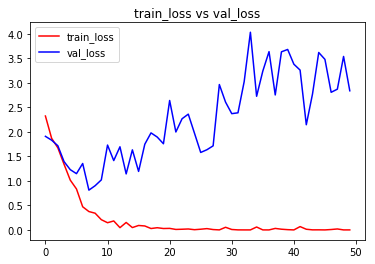

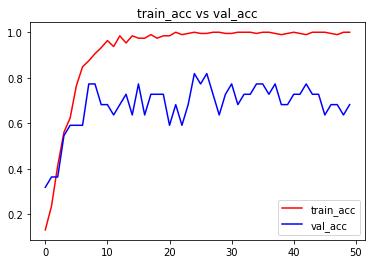

<Figure size 432x288 with 0 Axes>

In [0]:
# visualizing losses and accuracy
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

**Second architecture**

In [0]:
input_shape=(224,224,3)

model = Sequential()

model.add(Conv2D(6, (5, 5), input_shape=input_shape, padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (5, 5), padding='same', activation = 'relu'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.6))
model.add(Dense(7, activation = 'softmax'))


 
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

In [0]:
model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 224, 224, 6)       456       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 112, 112, 6)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 112, 112, 16)      2416      
_________________________________________________________________
activation_4 (Activation)    (None, 112, 112, 16)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 54, 54, 64)        9280      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 27, 27, 64)        0         
__________

True

In [0]:
from keras import callbacks
filename='model_train_new.csv'
filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"

csv_log=callbacks.CSVLogger(filename, separator=',', append=False)
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [csv_log,checkpoint]
callbacks_list = [csv_log]

In [0]:
hist = model.fit(X_train, y_train, batch_size=4, epochs=50, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks_list)

Train on 191 samples, validate on 22 samples
Epoch 1/50
191/191 [==============================] - 1s 7ms/step - loss: 2.1257 - acc: 0.1466 - val_loss: 1.9376 - val_acc: 0.2727
Epoch 2/50
191/191 [==============================] - 0s 2ms/step - loss: 1.9063 - acc: 0.2461 - val_loss: 1.8617 - val_acc: 0.3636
Epoch 3/50
191/191 [==============================] - 0s 2ms/step - loss: 1.8226 - acc: 0.2932 - val_loss: 1.7898 - val_acc: 0.3182
Epoch 4/50
191/191 [==============================] - 0s 2ms/step - loss: 1.5675 - acc: 0.4188 - val_loss: 1.6592 - val_acc: 0.4545
Epoch 5/50
191/191 [==============================] - 0s 2ms/step - loss: 1.3478 - acc: 0.4764 - val_loss: 1.5003 - val_acc: 0.4545
Epoch 6/50
191/191 [==============================] - 0s 2ms/step - loss: 1.1492 - acc: 0.5602 - val_loss: 1.2867 - val_acc: 0.5909
Epoch 7/50
191/191 [==============================] - 0s 2ms/step - loss: 0.9904 - acc: 0.6492 - val_loss: 1.2576 - val_acc: 0.7273
Epoch 8/50
191/191 [===========

In [0]:
#Model Save
model.save_weights('model_weights.h5')
model.save('model_keras.h5')



<Figure size 432x288 with 0 Axes>

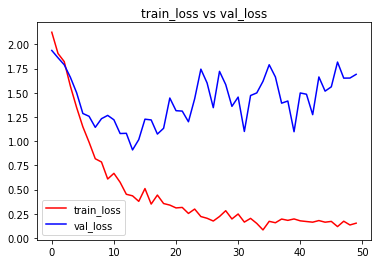

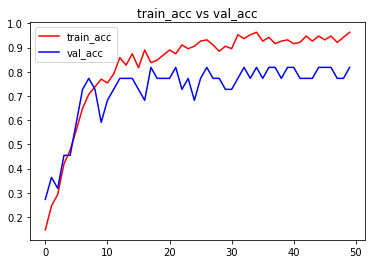

<Figure size 432x288 with 0 Axes>

In [0]:
# visualizing losses and accuracy
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

Test Loss: 1.6909199953079224
Test accuracy: 0.8181818127632141
(1, 224, 224, 3)
[[9.8600924e-07 7.9733070e-08 1.1262893e-09 6.4624732e-07 9.9999833e-01
  1.8272599e-08 8.5450065e-09]]
[4]
[[0. 0. 0. 0. 1. 0. 0.]]


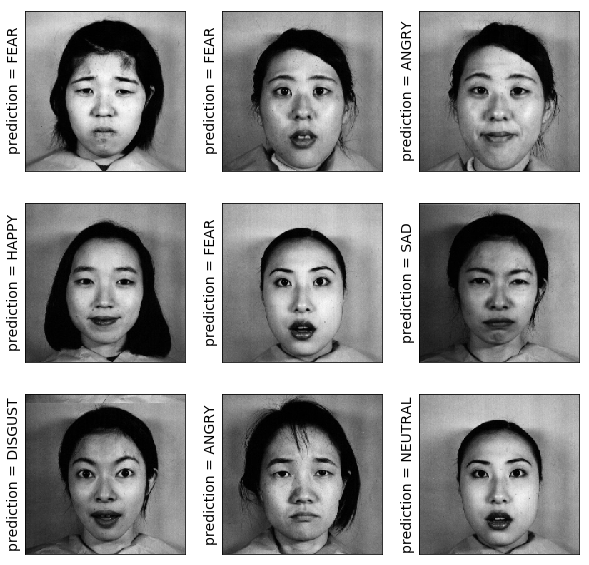

In [0]:
# Evaluating the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])

res = model.predict_classes(X_test[9:18])
plt.figure(figsize=(10, 10))

for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_test[i],cmap=plt.get_cmap('gray'))
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel('prediction = %s' % getLabel(res[i]), fontsize=14)
# show the plot
plt.show()

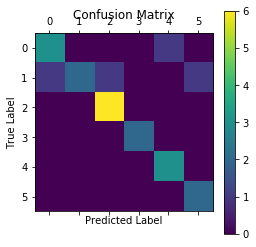

In [0]:
from sklearn.metrics import confusion_matrix
results = model.predict_classes(X_test)
cm = confusion_matrix(np.where(y_test == 1)[1], results)
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()